In [1]:
import pandas as pd
df = pd.read_csv("df_news_romance.csv")
df.head()

,label,sentence,NN,JJ
0,news,"['The', 'Fulton', 'County', 'Grand', 'Jury', '...",11,2
1,news,"['The', 'jury', 'further', 'said', 'in', 'term...",13,2
2,news,"['The', 'September-October', 'term', 'jury', '...",16,2
3,news,"['``', 'Only', 'a', 'relative', 'handful', 'of...",9,3
4,news,"['The', 'jury', 'said', 'it', 'did', 'find', '...",5,3


In [2]:
from sklearn.feature_extraction.text import CountVectorizer

tf_vectorizer = CountVectorizer(min_df =2, stop_words='english')
tf = tf_vectorizer.fit_transform(df['sentence'])

`CountVectorizer` computes the frequency of each word in each document. In the Brown corpus, each sentence is fairly short and so it is fairly common for all the words to appear only once. For a word cloud, we want to find a sentence with a variety of frequencies. We convert `tf` to an array because tf is natively a sparse matix, which is not navigable in the same way as other data structures. We then search for documents (rows) which have words with more than 10 occurances, with a statement that returns `True` when any column (axis=1) has a value greater than 10. `get_feature_names` yields the words being counted, listed in the same order as the counts in the array.

In [65]:
import numpy as np
tf_mat = tf.toarray()
docs = tf_mat[(tf_mat>10).any(axis=1)]
words = np.array(tf_vectorizer.get_feature_names())

`CountVectorizer` assigns every word in the corpus to a column in the array. We want to only look at the words that occur in the document, so we ask for all values in the array `doc` that are greater than 0. `doc` is arbitrarily chosen from our set of highly variable documents

In [66]:
doc = docs[1] 
idx = (doc>0)
doc_words = words[idx]
doc_counts = doc[doc>0]

We uze the `zip` method to couple the words to their counts, and then convert the collection of pairs to a dictionary using the `dict` function.

In [89]:
frequencies = dict(zip(doc_words, doc_counts))
frequencies

{'2d': 1,
 'albert': 1,
 'chairman': 1,
 'chance': 1,
 'committee': 1,
 'ethel': 1,
 'frank': 1,
 'harold': 1,
 'henry': 1,
 'hughes': 1,
 'includes': 1,
 'james': 1,
 'john': 2,
 'jr': 2,
 'lacy': 1,
 'moody': 1,
 'mrs': 15,
 'robert': 3,
 'spurdle': 2,
 'terry': 1,
 'trimble': 1,
 'william': 1}

We can also find out what row these frequencies come from so that we can compare to the orginal document. `(tf_mat>10).any(axis=1)` is `True` whenever any column in a row has a value greater than 10, and `nonzero` returns the position of `True` values. We then do a little unpacking and grab the element at position `1` because we took the document at position `1` from the docs matrix. We then select the row in our dataframe at the same position to get the original sentence.

In [74]:
doc_id = (tf_mat>10).any(axis=1).nonzero()[0][1]
df['sentence'][doc_id]

"['Mrs.', 'Robert', 'O.', 'Spurdle', 'is', 'chairman', 'of', 'the', 'committee', ',', 'which', 'includes', 'Mrs.', 'James', 'A.', 'Moody', ',', 'Mrs.', 'Frank', 'C.', 'Wilkinson', ',', 'Mrs.', 'Ethel', 'Coles', ',', 'Mrs.', 'Harold', 'G.', 'Lacy', ',', 'Mrs.', 'Albert', 'W.', 'Terry', ',', 'Mrs.', 'Henry', 'M.', 'Chance', ',', '2d', ',', 'Mrs.', 'Robert', 'O.', 'Spurdle', ',', 'Jr.', ',', 'Mrs.', 'Harcourt', 'N.', 'Trimble', ',', 'Jr.', ',', 'Mrs.', 'John', 'A.', 'Moller', ',', 'Mrs.', 'Robert', 'Zeising', ',', 'Mrs.', 'William', 'G.', 'Kilhour', ',', 'Mrs.', 'Hughes', 'Cauffman', ',', 'Mrs.', 'John', 'L.', 'Baringer', 'and', 'Mrs.', 'Clyde', 'Newman', '.']"

To make the wordcloud, we are going to use a special purpose library called [WordCloud](https://github.com/amueller/word_cloud/tree/c6a58531efacda4b1b40d613bf45f494b2077ed4) to visualize the frequency of the vectorized words. Here, we generate our wordcloud directly from the frequencies we computed above. 

In [51]:
from wordcloud import WordCloud

wordcloud = WordCloud().fit_words(frequencies)

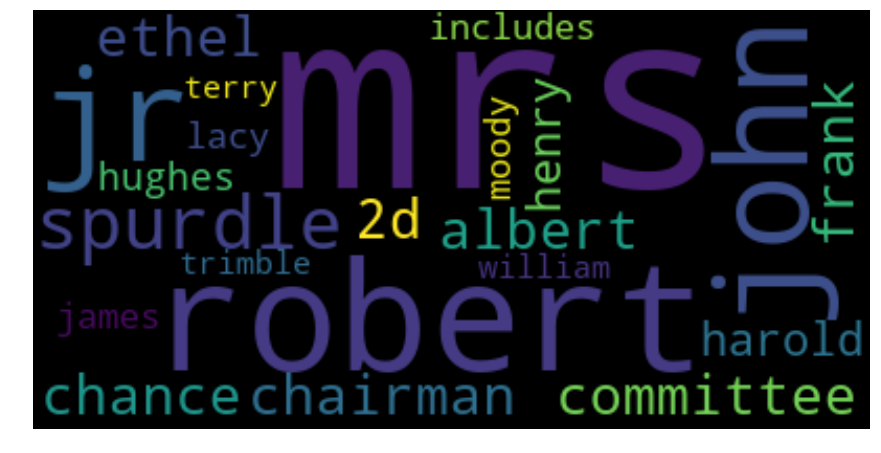

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(15,15))
_ = ax.imshow(wordcloud, interpolation='bilinear')
_ = ax.axis("off")
fig.savefig("images/countvect_wordcloud.png", bbox_inches = 'tight', pad_inches = 0)